In [74]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.preprocessing.image import load_img,array_to_img

In [85]:
(x_train, y_train), (x_test, y_test)=mnist.load_data()

(60000, 28, 28)
(60000,)
(60000, 28, 28)
(60000,)


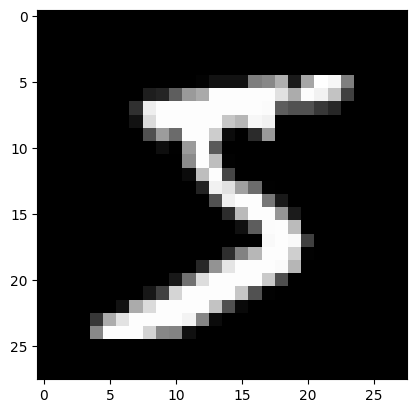

Given image contains 5


In [87]:
print(x_train.shape)
print(y_train.shape)
print(x_train.shape)
print(y_train.shape)
i=0
plt.imshow(x_train[i],cmap='grey')
plt.show()
print("Given image contains",y_train[i])

In [88]:
import keras
y_train=keras.utils.to_categorical(y_train,10) # Must not run this block more than omce
y_test=keras.utils.to_categorical(y_test,10) # 10 digits
print(y_train.shape)

(60000, 10)


In [91]:
im_height=28
im_width=28
x_train=x_train.reshape(60000,im_height*im_width)
x_train=x_train.astype('float')
x_train/=255
x_test=x_test.reshape(10000,im_height*im_width)
x_test=x_test.astype('float')
x_test/=255

print(x_train.shape)
# print(x_train[0])

(60000, 784)


In [99]:
model=keras.models.Sequential()
model.add(keras.layers.Dense(512,input_shape=(784,),name='HL1',activation='leaky_relu'))
model.add(keras.layers.Dense(512,name='HL2',activation='leaky_relu'))
model.add(keras.layers.Dense(10,name='OL',activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics='accuracy')
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 HL1 (Dense)                 (None, 512)               401920    
                                                                 
 HL2 (Dense)                 (None, 512)               262656    
                                                                 
 OL (Dense)                  (None, 10)                5130      
                                                                 
Total params: 669706 (2.55 MB)
Trainable params: 669706 (2.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [121]:
import pandas as pd
VERBOSE=1
BATCH_SIZE=64
EPOCHS=20
VALIDATION_SPLIT=0.2
history=model.fit(x_train,y_train,verbose=VERBOSE,batch_size=BATCH_SIZE,epochs=EPOCHS,validation_split=VALIDATION_SPLIT)

Epoch 1/20
750/750 [==============================] - 5s 6ms/step - loss: 0.2266 - accuracy: 0.9274 - val_loss: 0.2155 - val_accuracy: 0.9366
Epoch 2/20
750/750 [==============================] - 5s 6ms/step - loss: 0.2196 - accuracy: 0.9296 - val_loss: 0.2270 - val_accuracy: 0.9310
Epoch 3/20
750/750 [==============================] - 5s 6ms/step - loss: 0.2058 - accuracy: 0.9346 - val_loss: 0.1925 - val_accuracy: 0.9404
Epoch 4/20
750/750 [==============================] - 5s 7ms/step - loss: 0.2119 - accuracy: 0.9317 - val_loss: 0.1969 - val_accuracy: 0.9388
Epoch 5/20
750/750 [==============================] - 6s 8ms/step - loss: 0.2118 - accuracy: 0.9319 - val_loss: 0.2415 - val_accuracy: 0.9244
Epoch 6/20
750/750 [==============================] - 6s 8ms/step - loss: 0.2099 - accuracy: 0.9326 - val_loss: 0.2004 - val_accuracy: 0.9380
Epoch 7/20
750/750 [==============================] - 8s 11ms/step - loss: 0.2067 - accuracy: 0.9337 - val_loss: 0.2150 - val_accuracy: 0.9333
Epoch

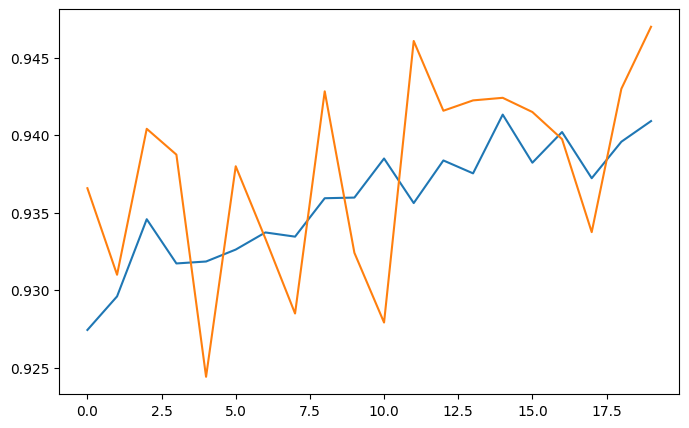

In [122]:
pd.DataFrame(history.history)['accuracy'].plot(figsize=(8,5))
pd.DataFrame(history.history)['val_accuracy'].plot(figsize=(8,5))
plt.show()

In [123]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1750 - accuracy: 0.9442


[0.1749797761440277, 0.9441999793052673]

In [124]:
model.save("mnist_save")

INFO:tensorflow:Assets written to: mnist_save\assets


INFO:tensorflow:Assets written to: mnist_save\assets
